## Welcome to Week 0!

Live sessions during this course will be oriented primarily around:

1.   Lecture
2.   Programming in [Jupyter notebooks](https://jupyter.org/) like the one you're in now.

We will release notebooks on Mondays. Before lecture, you should download the .ipynb file, and open it either locally on your own machine or in Google Colab. It's a good idea to skim the notebook to get a sense for what it covers, but **don't start working on it before lecture**--the idea is for you to starting working on these **in class** (with the instructors and, more importantly, with your classmates).

---

This week we have some warm-up excercises to go through so that we can all practice using notebooks and some other tools that will be used throughout the course.

*   Google Colab is a tool for editing and running Jupyter notebooks using Google's infrastructure. For most of you, using Colab to edit and run notebooks will make your life easier, especially after week 5 of the course.
*   We're asking you to do Week 0's assignment (this one) in Colab, but after today you **aren't required to use it**.


### Task 1 -- Mounting your Google Drive and loading in the data
*   Make a folder in Google Drive where you can put content for the course. Then
download the .ipynb file released in Canvas, along with any accompanying data (this week the data is `time_series_covid_19_confirmed.csv`).
*   Upload these to your Google Drive folder, and open the .ipynb file in Colab:

  <img src='https://drive.google.com/uc?id=1qIfHxtBqfIhnRblvBQMZKAIJrS8ne4Ik' width="400">


Now connect this Colab notebook to your Google Drive and load in the COVID data. There are [several ways to do this](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=c2W5A2px3doP), but just follow along with the two options we present below:

In [3]:
import pandas as pd
# use this to wrangle .csv files


---

**Option 1: mounting locally**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


^^ This mounts your Google Drive at the location */content/drive* on the virtual machine running this notebook.

In [5]:
# my copy of the COVID data is located in my drive at Datasets/week_0/time_series_covid_19_confirmed.csv
data = pd.read_csv('/content/drive/MyDrive/FourthBrain/time_series_covid_19_confirmed.csv')


---
**Option 2: use the PyDrive library**

In [6]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Get the unique identifier for the file containing COVID data in your Google Drive: 

1.   Right-click on the name of the file 
2.   Click "Get link"
3.   Copy the characters between `d/` and the following slash
4.   Paste them into the dictionary element of the call to `drive.CreateFile()` below.

In [8]:
downloaded = drive.CreateFile({'id':'1NjWsWLjWkAAniw83hk1R4xbqHJZ_pkSB'})
downloaded.GetContentFile('time_series_covid_19_confirmed.csv') 

^^ This should have **created** a file called `time_series_covid_19_confirmed.csv` in the current directory on the virtual machine. Now you can load it from there:

In [9]:
data = pd.read_csv('time_series_covid_19_confirmed.csv')



---

### Task 2 -- Get familiar with the data


In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9228,9398,9744,10093,10306,10469,10621,10938,11284,11548,11837,12160,12297,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184,15491,15834,16153,16534,16844,17306,17606,17989,18313,18476,18802,19213,19678,20155,20677,21251,21668
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1629,1640,1654,1674,1674,1681,1691,1703,1711,1726,1728,1730,1734,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841,1847,1858,1858,1869,1882,1889,1892,1899,1906,1907,1911,1916,1924,1930,1933,1943,1946
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3386,3583,3789,3856,4328,4481,4552,5002,5249,5555,5963,6228,6347,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501,8663,9021,9186,9343,9839,9981,10218,10372,10627,10831,11082,11148,11285,11376,11601,11779,11902


Write a few sentences describing what you notice about this data:

[Your response here]





Subsample the data so that it only uses 50 countries and the first 100 days

In [12]:
# [YOUR CODE HERE]
infections = data.iloc[:50,:104]

Take a random subsample of 5 countries and plot infections vs time (you can report time as the number of days after January 22, 2020)

In [13]:
sample = infections.sample(n=5, replace=True, random_state=1)
sample

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
37,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,84,87,91,96,96,99,99,103,107,109,109,110,114,114,114,114,115,117,119,119,120,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
43,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20,20,21,35,36,39,64,72,96,103,127,167,182,182,203,203,217,217,221,230,243,242,246,246,246,250,250,253,254,254,255,257,262,263,267,271,273,273,275,277
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,100,134,170,170,235,257,287,299,305,337,367,367,396,407,407,411,411,415,420,428,429,429,429,433,433,433,435,435,435,435,437,438,438,438,438,438,438,438,438,438
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,32,39,39,53,62,71,77,78,80,84,87,91,93,96,96,96,99,100,103,103,103,102,103,103,103,103,103,103,104,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,669,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863,2870,2886,2897,2926,2936,2957,2963,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


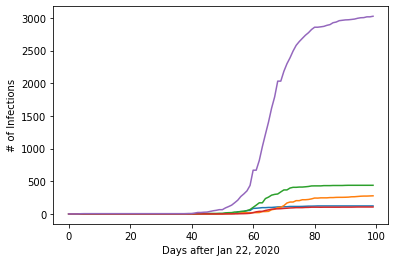

In [14]:
# [YOUR CODE HERE]
dates = np.arange(0, 100, 1)


row1 = sample.iloc[0]
row2 = sample.iloc[1]
row3 = sample.iloc[2]
row4 = sample.iloc[3]
row5 = sample.iloc[4]

plt.plot(dates,row1[4:])
plt.plot(dates,row2[4:])
plt.plot(dates,row3[4:])
plt.plot(dates,row4[4:])
plt.plot(dates,row5[4:])
plt.xlabel('Days after Jan 22, 2020')
plt.ylabel('# of Infections')
plt.show()




In [36]:
row5['Lat']

-33.8688

### Task 3 -- Set up a regression problem based on latitude, longitude, and date
Okay, so now we're going to see if the combination of latitude, longitude, and date can be used to accurately predict the number of infections in this dataset.

Start by creating two matrices $\mathbf{X}$ and $\mathbf{Y}$, where $\mathbf{X}$ holds the [latitude, longitude, date] data and $\mathbf{Y}$ holds the infection data. $\mathbf{X}$ will have shape $k \times 3$ and $\mathbf{Y}$ should have shape $k \times 1$. What is the value $k$, based on the size of the subsample from the full dataset that we've taken?


k = 5000



Create the matrices $\mathbf{X}$ and $\mathbf{Y}$ below:

In [ ]:
temp = []
for i in range(50):
  for j in range(100):
    temp.append([infections.iloc[i]['Lat'], infections.iloc[i]['Long'], dates[j][0]])
temp

In [47]:
dates = infections.columns[4:].values.reshape(100,1)

print(dates[0][0])
X = np.asmatrix(temp)
Y = np.asmatrix(infections.iloc[:,4:].values.reshape(5000,1))
print(Y.shape)
# [YOUR CODE HERE]

1/22/20
(5000, 1)


Make a plot with 3 subplots, one for each of the independent variables (latitude, longitude, and date). Plot the data, displaying the independent variable on the x axis and the dependent variable (infections) on the y axis

In [ ]:
# [YOUR CODE HERE]

Discuss with your classmates in your breakout room what you notice about this data. Are there other ways you might try to visualize it to uncover some structure? Does this data look like a good candidate for fitting a linear model?

[Your answer here]



Now split the data randomly into training and test sets. Make the training set 70% of the data and the test set the remaining 30%. You could do this manually, but we'll use the `train_test_split` function from the machine learning library [scikit-learn](https://scikit-learn.org/stable/).

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

NameError: ignored

^^ What is the `random_state` parameter doing? Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) on `train_test_split` to find out. 

Note: This week is a good time to get very familiar with scikit-learn, if you haven't already. We will be using it a fair amount in this course and it's a great resource for applying machine learning models.

### Task 4 -- Apply a polynomial regression of degree 3 to this data

You could do this manually using concepts we will cover next week, but for now let's use scikit-learn's `PolynomialFeatures` and `LinearRegression` modules.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
print("New shape of test data=", np.shape(X_test_poly))

lin_regression = LinearRegression()
# Fit the model on train data only
lin_regression.fit(X_train_poly, Y_train)
print("The regression coefficients are: ", lin_regression.coef_)
print("The intercept is", lin_regression.intercept_)

Now use the `.predict()` method of the `lin_regression` object above to generate predictions on the test data. Compare the predictions to `Y_test` using a plot.

In [ ]:
# [YOUR CODE HERE]

Report the mean squared error of your predictions.

The mean squared error is = [YOUR ANSWER HERE]

### Task 5 -- Run an experiment identifying the degree of the best-fitting polynomial regression

Your job is now to repeat the fitting and prediction steps above, but for polyomials of all orders from 1 to 20. For each fit, compute and save the mean squared error of the predictions.



In [ ]:
# [YOUR CODE HERE]

Report the polynomial order that resulted in the best fit. Does this number make sense? Do you think the regression has produced a good model for the data? Discuss with your classmates.